In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import mplleaflet
import geopandas as gpd

import pandas as pd
from shapely.geometry import Point

In [6]:
ct = gpd.read_file("shapes/topojson/state.topojson")
cttowns = gpd.read_file("shapes/topojson/towns.topojson")

cttowns.crs = {'init' :'epsg:4326'}
cttowns = cttowns.to_crs(epsg=2234)
cttowns = cttowns[cttowns["ALAND10"] != 0]

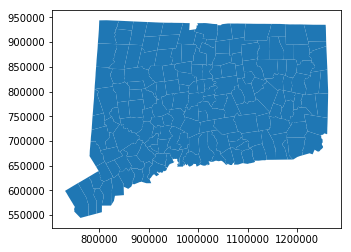

In [8]:
cttowns.plot()

In [105]:
# from matplotlib.colors import ListedColormap

# def locate(town_name):
    
#     f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,8))
    
#     cmap = ListedColormap(['lightgray','red'], name='allred')
#     df = cttowns
#     df["the_town"] = df["NAME10"] == town_name
    
#     town_df = df[df["the_town"]]
#     df.plot(column="the_town",cmap=cmap,ax=ax1,)
#     town_df.plot(column="the_town",cmap=cmap,ax=ax2,)

#     ax1.set(aspect="auto")
#     ax2.set(aspect="auto")

    
#     _ = ax1.axis('off')
#     _ = ax2.axis('off')
#     lims = plt.axis('equal') # Fixes distortion issue
#     #plt.tight_layout()
    
#     return 

# locate("Colchester")

In [124]:
import matplotlib

matplotlib.style.use('mirror00')


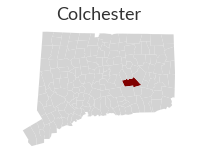

In [155]:
from matplotlib.colors import ListedColormap

def locate(place_name,place_name_col="NAME10",main_df=cttowns):
    
    cmap = ListedColormap(['lightgray','maroon'])
    df = main_df.copy()
    df["is_the_place"] = df[place_name_col] == place_name
    
    tmp_df = df[df["is_the_place"]]
    ax = df.plot(column="is_the_place",cmap=cmap)
    ax.set_title(place_name,fontsize=18,color="#333333")

    # Hide the axes and remove the padding from the file output
    # https://stackoverflow.com/a/26610602/8125938
    ax.axis('off')
    ax.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    plt.savefig("locators/" + place_name + ".png",bbox_inches="tight")#, transparent=True)
    
    return ax

locate("Colchester")



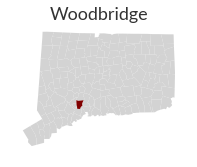

In [156]:
for n in cttowns["NAME10"].unique():
    plt.close()
    locate(n)